In [ ]:
#importing modules
import tensorflow as tf
import numpy as np
import glob
from skimage.transform import resize
from sklearn.utils import shuffle
from matplotlib.pyplot import imread

2021-10-12 13:47:44.958183: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
#selecting path
train_cats_list = glob.glob("../input/dog-vs-cat-fastai/dogscats/train/cats/*.jpg")
train_dogs_list = glob.glob("../input/dog-vs-cat-fastai/dogscats/train/dogs/*.jpg")

test_cats_list = glob.glob("../input/dog-vs-cat-fastai/dogscats/valid/cats/*.jpg")
test_dogs_list = glob.glob("../input/dog-vs-cat-fastai/dogscats/valid/dogs/*.jpg")

In [ ]:
#data preprocessing 
xtr , ytr , xte , yte = ([],[],[],[])

for image in train_cats_list:

    xtr.append(resize(imread(image),(64,64)))
    
for image in train_dogs_list:

    xtr.append(resize(imread(image),(64,64)))

for image in test_cats_list:

    xte.append(resize(imread(image),(64,64)))

for image in test_dogs_list:
    xte.append(resize(imread(image),(64,64)))
    
ytr , yte = ([],[])

ytr  += [ 0 for _ in range(len(train_cats_list))]
ytr  += [ 1 for _ in range(len(train_dogs_list))]

yte  += [0 for _ in range(len(test_cats_list))]
yte  += [1 for _ in range(len(test_dogs_list))]

xtr = np.array(xtr)
xte = np.array(xte)
ytr = np.array(ytr)
yte = np.array(yte)

In [ ]:
xtr , ytr = shuffle(xtr , ytr, random_state = 123)
xte , yte = shuffle(xte, yte, random_state = 123)

In [ ]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(23000, 64, 64, 3)
(2000, 64, 64, 3)
(23000,)
(2000,)


In [ ]:
#creating model
model = tf.keras.models.Sequential()

2021-10-12 14:03:22.424717: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-12 14:03:22.428787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-12 14:03:22.470275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-12 14:03:22.470921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-12 14:03:22.470970: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-12 14:03:22.497159: I tensorflow/stream_executor/platform/def

In [ ]:
#adding layers
nf = 32
model.add(tf.keras.layers.BatchNormalization(input_shape=(64,64,3)))
model.add(tf.keras.layers.Conv2D(nf*4, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(nf*4, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(nf*2, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(nf*2, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(nf*2, (3, 3),padding="same", activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
#compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        7

In [ ]:
#training 
history = model.fit(xtr,ytr,batch_size=10,epochs=30,validation_data=(xte,yte))

2021-10-12 14:03:24.863240: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1130496000 exceeds 10% of free system memory.
2021-10-12 14:03:25.730387: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-12 14:03:25.740603: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/30


2021-10-12 14:03:26.643984: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-12 14:03:27.289712: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-12 14:03:27.310502: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2300/2300 [==============================] - 19s 5ms/step - loss: 0.7118 - accuracy: 0.6193 - val_loss: 0.5382 - val_accuracy: 0.7320
Epoch 2/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.4970 - accuracy: 0.7548 - val_loss: 0.5699 - val_accuracy: 0.7190
Epoch 3/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.4350 - accuracy: 0.7963 - val_loss: 0.4403 - val_accuracy: 0.8020
Epoch 4/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.3994 - accuracy: 0.8177 - val_loss: 0.4768 - val_accuracy: 0.8010
Epoch 5/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.3551 - accuracy: 0.8477 - val_loss: 0.3296 - val_accuracy: 0.8640
Epoch 6/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.3282 - accuracy: 0.8566 - val_loss: 0.5655 - val_accuracy: 0.8175
Epoch 7/30
2300/2300 [==============================] - 12s 5ms/step - loss: 0.2973 - accuracy: 0.8714 - val_loss: 0.7030 - val_accuracy: 0.7

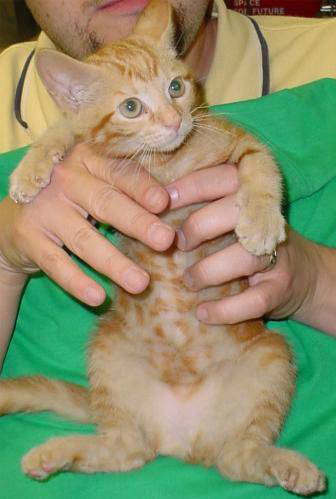

In [ ]:
#plotting cat image 
tf.keras.preprocessing.image.load_img('../input/dog-vs-cat-fastai/dogscats/valid/cats/cat.1001.jpg')

In [ ]:
#load image
test_img = tf.keras.preprocessing.image.load_img('../input/dog-vs-cat-fastai/dogscats/valid/cats/cat.1001.jpg', target_size = (64, 64))
                                            
#converting image to array 
img = tf.keras.preprocessing.image.img_to_array(test_img)

#expanding dimension
img = np.expand_dims(img, axis=0)

#prediction 
result = model.predict(img)

if result[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'
#printing prediction    
print(pred)

cat


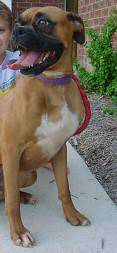

In [ ]:
#plotting dog image 
tf.keras.preprocessing.image.load_img('../input/dog-vs-cat-fastai/dogscats/valid/dogs/dog.10199.jpg')

In [ ]:
#load image
test_img = tf.keras.preprocessing.image.load_img('../input/dog-vs-cat-fastai/dogscats/valid/dogs/dog.10199.jpg', target_size = (64, 64))

#converting image to array 
img = tf.keras.preprocessing.image.img_to_array(test_img)

#expanding dimension 
img = np.expand_dims(img, axis = 0)

#prediction
result = model.predict(img)

if result[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'
    
#printing prediction
print(pred)

cat


In [ ]:
result

array([[0.]], dtype=float32)